<a href="https://colab.research.google.com/github/princealexanderm/ICT_DAS_Prince_Alex/blob/main/Assignment_Regression_Prince.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date: 31 july 2024**

**Case Study on Regression**
The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

Data file name:car_age_price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/car_age_price.csv')
df.head(5)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [27]:
df['Year'].value_counts()

,count
Year,
2017,47
2015,22
2019,12
2018,11
2016,6
2014,6
2020,4
2013,4


In [28]:
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

#Step-1: Checking the basic information

In [3]:
df.shape

(112, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


no null values, all are int type

In [5]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


#step-2: Checking for missing values

In [6]:
df.isna().sum()

,0
Year,0
Price,0


no missing values

#step-3: Checking for outliers

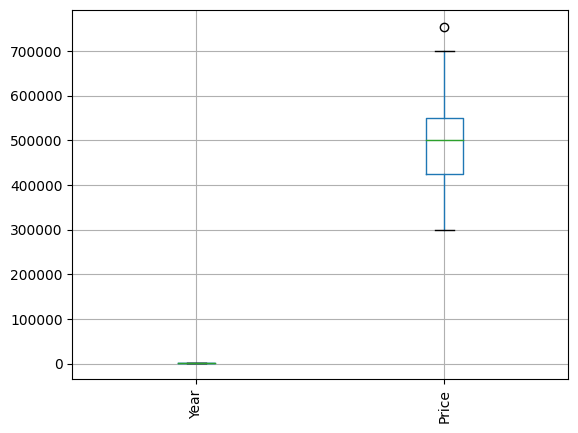

In [8]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

seems like one outier

#Step-4:Split the table into independent variable and target variable

In [9]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [13]:
X=df.drop('Price',axis=1)
y=df['Price']

#Step-5: Split the data for training and testing

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [15]:
X_test.head(3)

,Year
40,2019
65,2017
4,2018


In [16]:
X_test.shape

(23, 1)

In [17]:
X_train.shape

(89, 1)

#Step-6:Creating a model-LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

#Step-7:Evaluating the model

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

4326906256.829671

In [20]:
r2=r2_score(y_test,y_pred)
r2

0.36759313425902185

#predicting 2022 value

In [29]:
X_test=[2022]
y_pred2022=model.predict([X_test])
y_pred2022

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

#Step-8: Lasso regression

In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso_model=lasso.fit(X_train,y_train)
y_pred_lasso=lasso_model.predict(X_test)

#Evaluation

In [23]:
mean_squared_error(y_test,y_pred_lasso)

4326859771.015669

In [26]:
r2_score(y_test,y_pred_lasso)

0.3675999284778446

# predicting 2022 value

In [31]:
X_test=[2022]
y_pred2022lasso=lasso_model.predict([X_test])
y_pred2022lasso

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])